In [1]:
library(GLMsData)
library(statmod)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(blocks)

In [3]:
str(blocks)

'data.frame':	100 obs. of  6 variables:
 $ Child : Factor w/ 25 levels "A","B","C","D",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Number: int  11 9 8 9 10 13 10 7 6 12 ...
 $ Time  : num  30 19 18.6 23 29 178 42 20.2 12 39.2 ...
 $ Trial : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Shape : Factor w/ 2 levels "Cube","Cylinder": 1 1 1 1 1 1 1 1 1 1 ...
 $ Age   : num  4.67 5 4.42 4.33 4.33 4.83 4.42 5 3.58 4 ...


In [4]:
glm.1 <- glm(Time ~ Age, family = Gamma(link="log"), data=blocks)

In [6]:
summary(glm.1)$dispersion

[1] 0.753253

In [8]:
deviance(glm.1)/df.residual(glm.1)
sum(weights(glm.1)*residuals(glm.1, type="working")^2)/df.residual(glm.1)
sum(glm.1$weights * glm.1$residuals^2)/df.residual(glm.1)

[1] 0.5208153

[1] 0.753253

[1] 0.753253


	Shapiro-Wilk normality test

data:  qresid(glm.1)
W = 0.93607, p-value = 0.0001119


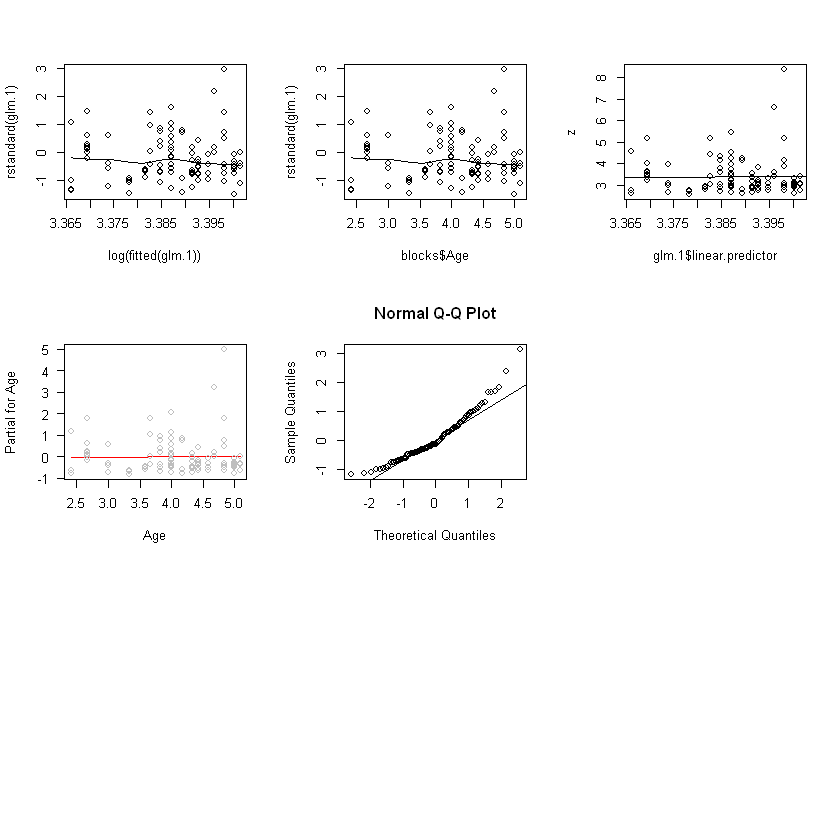

In [16]:
par(mfrow=c(3, 3))
scatter.smooth(rstandard(glm.1) ~ log(fitted(glm.1)))
scatter.smooth(rstandard(glm.1) ~ blocks$Age)

z <- resid(glm.1, type="working") + glm.1$linear.predictor
plot(z ~ glm.1$linear.predictor)
abline(0, 1)
termplot(glm.1, partial.resid=TRUE, las=1)
qqnorm(qresid(glm.1))
qqline(qresid(glm.1))
shapiro.test(qresid(glm.1))

In [14]:
colSums(influence.measures(glm.1)$is.inf)

dfb.1_ dfb.Age   dffit   cov.r  cook.d     hat 
      0       0       1       8       0       0

In [15]:
rowSums(influence.measures(glm.1)$is.inf)

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  0   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   0   0   0   0   0

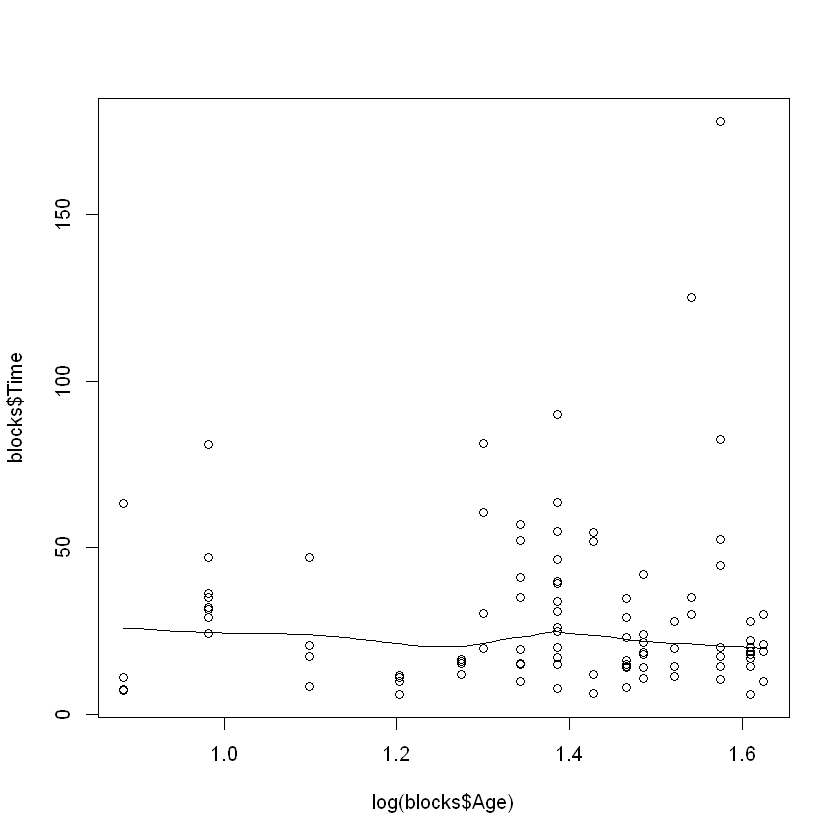

In [18]:
scatter.smooth(blocks$Time ~ log(blocks$Age))

In [20]:
glm.2 <- glm(Time ~ Age, family=inverse.gaussian(link="log"), data=blocks)

In [22]:
anova(glm.2, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,99,2.030796,NA,NA
Age,1,0.0003268299,98,2.030469,0.0128823,0.9098662


In [23]:
coef(summary(glm.2))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.33442155,0.4763562,6.999849,3.216044e-10
Age,0.01317146,0.1165450,0.113016,9.102490e-01


In [26]:
gof.dev <- deviance(glm.2)
pchisq(gof.dev, df=df.residual(glm.2))

[1] 1.275387e-63